In [2]:
!pip install geopandas

  Using cached pyproj-3.5.0-cp38-cp38-win_amd64.whl (5.1 MB)



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\aky\AppData\Local\Temp\ipykernel_19320\3465571729.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://s

## Loading the GeoJSON file

In [2]:
regions_url = '../../../data/regions.geojson'
provinces_url = '../../../data//provinces.geojson'
municipalities_url = '../../../data/municipalities.geojson'

In [3]:
region_geo = gpd.read_file(regions_url)
province_geo = gpd.read_file(provinces_url)
municipalities_geo = gpd.read_file(municipalities_url)

C:\Users\aky\AppData\Local\Temp\ipykernel_18116\2083943518.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(province_geo.geometry.centroid.x, province_geo.geometry.centroid.y, province_geo.prov_name):
C:\Users\aky\AppData\Local\Temp\ipykernel_18116\2083943518.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(province_geo.geometry.centroid.x, province_geo.geometry.centroid.y, province_geo.prov_name):


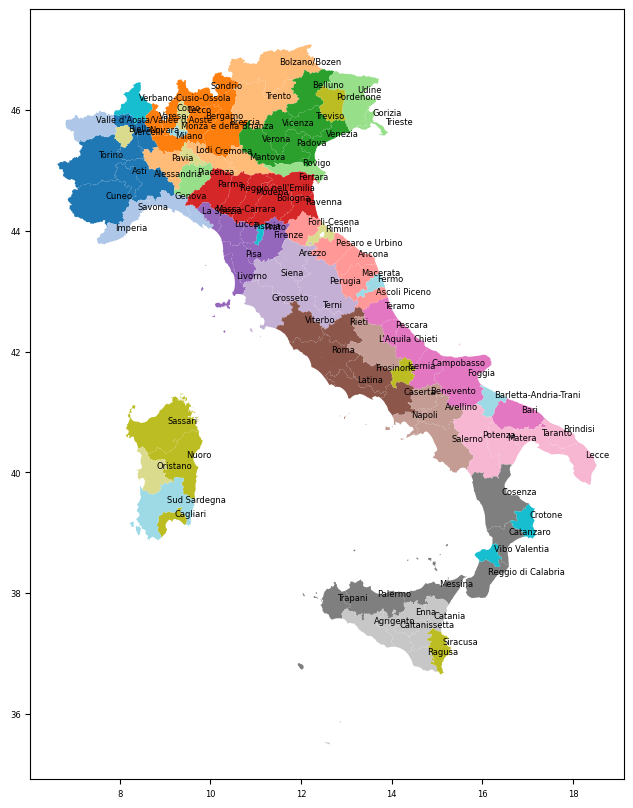

In [42]:
province_geo.plot(column='prov_istat_code_num', cmap='tab20', figsize=(10, 10))
# add labels to the plot
for x, y, label in zip(province_geo.geometry.centroid.x, province_geo.geometry.centroid.y, province_geo.prov_name):
    plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    plt.rcParams.update({'font.size': 6})
plt.show()

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


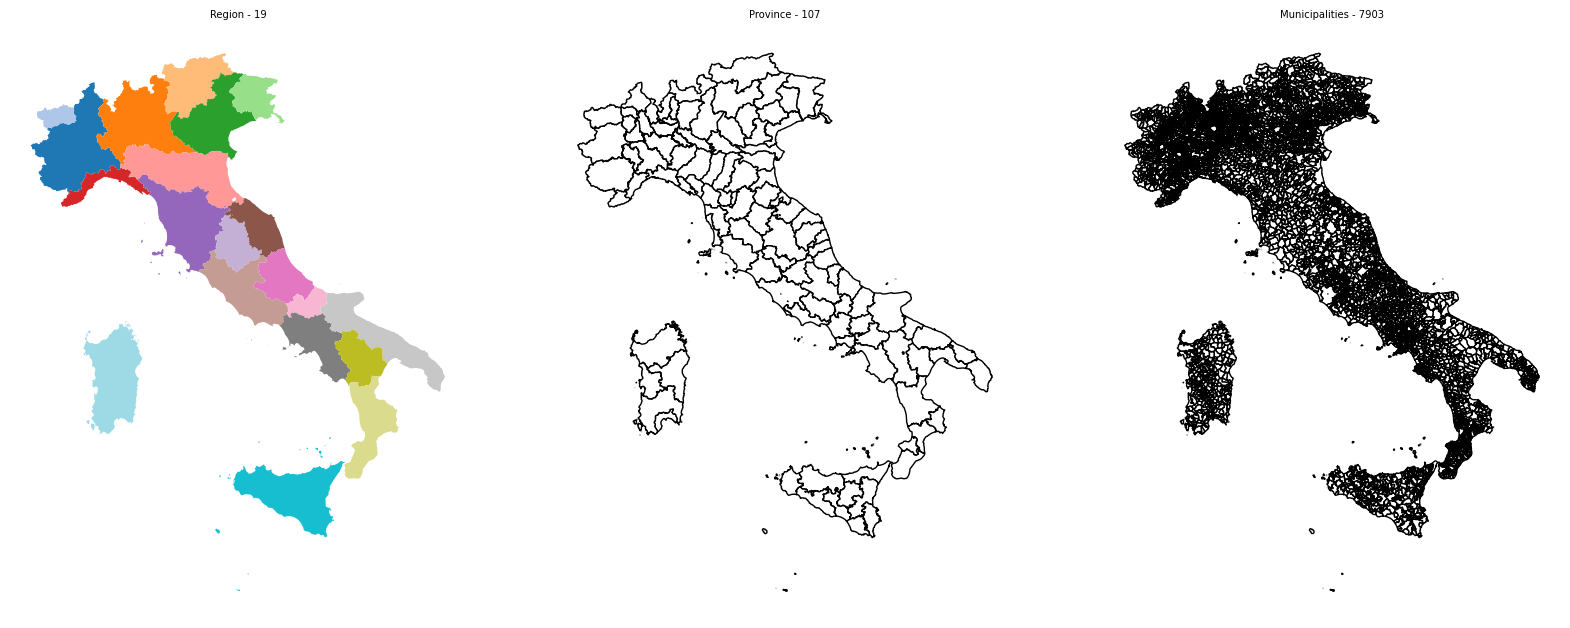

In [59]:
# ploting region, province and municipalities side by side
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
region_geo.plot(ax=ax[0], colormap='tab20')
province_geo.plot(ax=ax[1], column='prov_istat_code_num', color='white', edgecolor='black')
municipalities_geo.plot(ax=ax[2], color='white', edgecolor='black')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('Region - 19')
ax[1].set_title('Province - 107')
ax[2].set_title('Municipalities - 7903')
plt.show()

## Creating the GeoDataFrames

In [4]:
region_df = gpd.GeoDataFrame(region_geo)
province_df = gpd.GeoDataFrame(province_geo)
municipalities_df = gpd.GeoDataFrame(municipalities_geo)

In [6]:
region_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13608 45.27952, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73324 45.92345, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.58243 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.02158 46.55966..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63673 45.52090..."
5,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.52109 46..."
6,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.54683 43.8..."
7,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33055 44.7..."
8,Toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.90268 44.1..."
9,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.16034 42..."


In [7]:
province_df

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89303 45.58549, ..."
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92726 45.73470, ..."
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.41114 45.83017, ..."
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.93465 44.4..."
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.95845 45.11689, ..."
...,...,...,...,...,...,...,...,...
102,Sassari,90,SS,Sardegna,20,20,090,"MULTIPOLYGON (((9.46502 40.65584, 9.46568 40.6..."
103,Nuoro,91,NU,Sardegna,20,20,091,"MULTIPOLYGON (((9.28037 39.91741, 9.28195 39.9..."
104,Cagliari,92,CA,Sardegna,20,20,092,"MULTIPOLYGON (((8.84872 39.09924, 8.84784 39.0..."
105,Oristano,95,OR,Sardegna,20,20,095,"MULTIPOLYGON (((8.78200 40.18982, 8.78060 40.1..."


In [14]:
# count unique values in column prov_istat_code_num
print(province_df['prov_istat_code_num'].nunique())

107


In [15]:
municipalities_df

,name,op_id,name_de,name_sl,minint_elettorale,minint_finloc,name_it,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,geometry
0,Agliè,130,NaN,NaN,1010810010,1010810010,NaN,Torino,001,1,TO,Piemonte,01,1,1,A074,001001,1001,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,131,NaN,NaN,1010810020,1010810020,NaN,Torino,001,1,TO,Piemonte,01,1,2,A109,001002,1002,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,132,NaN,NaN,1010810030,1010810030,NaN,Torino,001,1,TO,Piemonte,01,1,3,A117,001003,1003,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,133,NaN,NaN,1010810040,1010810040,NaN,Torino,001,1,TO,Piemonte,01,1,4,A157,001004,1004,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,135,NaN,NaN,1010810060,1010810060,NaN,Torino,001,1,TO,Piemonte,01,1,6,A218,001006,1006,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,Presicce-Acquarica,NaN,NaN,NaN,NaN,NaN,NaN,Lecce,075,75,LE,Puglia,16,16,8366,M428,075098,75098,"MULTIPOLYGON (((18.26817 39.93148, 18.27101 39..."
7900,Borgo d'Anaunia,NaN,NaN,NaN,NaN,NaN,NaN,Trento,022,22,TN,Trentino-Alto Adige/Südtirol,04,4,8367,M429,022252,22252,"MULTIPOLYGON (((11.21582 46.44893, 11.21697 46..."
7901,Novella,NaN,NaN,NaN,NaN,NaN,NaN,Trento,022,22,TN,Trentino-Alto Adige/Südtirol,04,4,8368,M430,022253,22253,"MULTIPOLYGON (((11.06230 46.49919, 11.06404 46..."
7902,Ville di Fiemme,NaN,NaN,NaN,NaN,NaN,NaN,Trento,022,22,TN,Trentino-Alto Adige/Südtirol,04,4,8369,M431,022254,22254,"MULTIPOLYGON (((11.49684 46.36064, 11.49898 46..."


In [33]:
# unique values in column com_catasto_code	
municipalities_df['com_catasto_code'].unique()

array(['A074', 'A109', 'A117', ..., 'M430', 'M431', 'N.d.'], dtype=object)

In [40]:
# count all unique values in each column
#municipalities_df.nunique()
municipalities_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7904 entries, 0 to 7903
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 7904 non-null   object  
 1   op_id                7857 non-null   object  
 2   name_de              117 non-null    object  
 3   name_sl              7 non-null      object  
 4   minint_elettorale    7875 non-null   object  
 5   minint_finloc        7819 non-null   object  
 6   name_it              124 non-null    object  
 7   prov_name            7904 non-null   object  
 8   prov_istat_code      7904 non-null   object  
 9   prov_istat_code_num  7904 non-null   int64   
 10  prov_acr             7904 non-null   object  
 11  reg_name             7904 non-null   object  
 12  reg_istat_code       7904 non-null   object  
 13  reg_istat_code_num   7904 non-null   int64   
 14  opdm_id              7904 non-null   object  
 15  com_catasto_c

<AxesSubplot:>

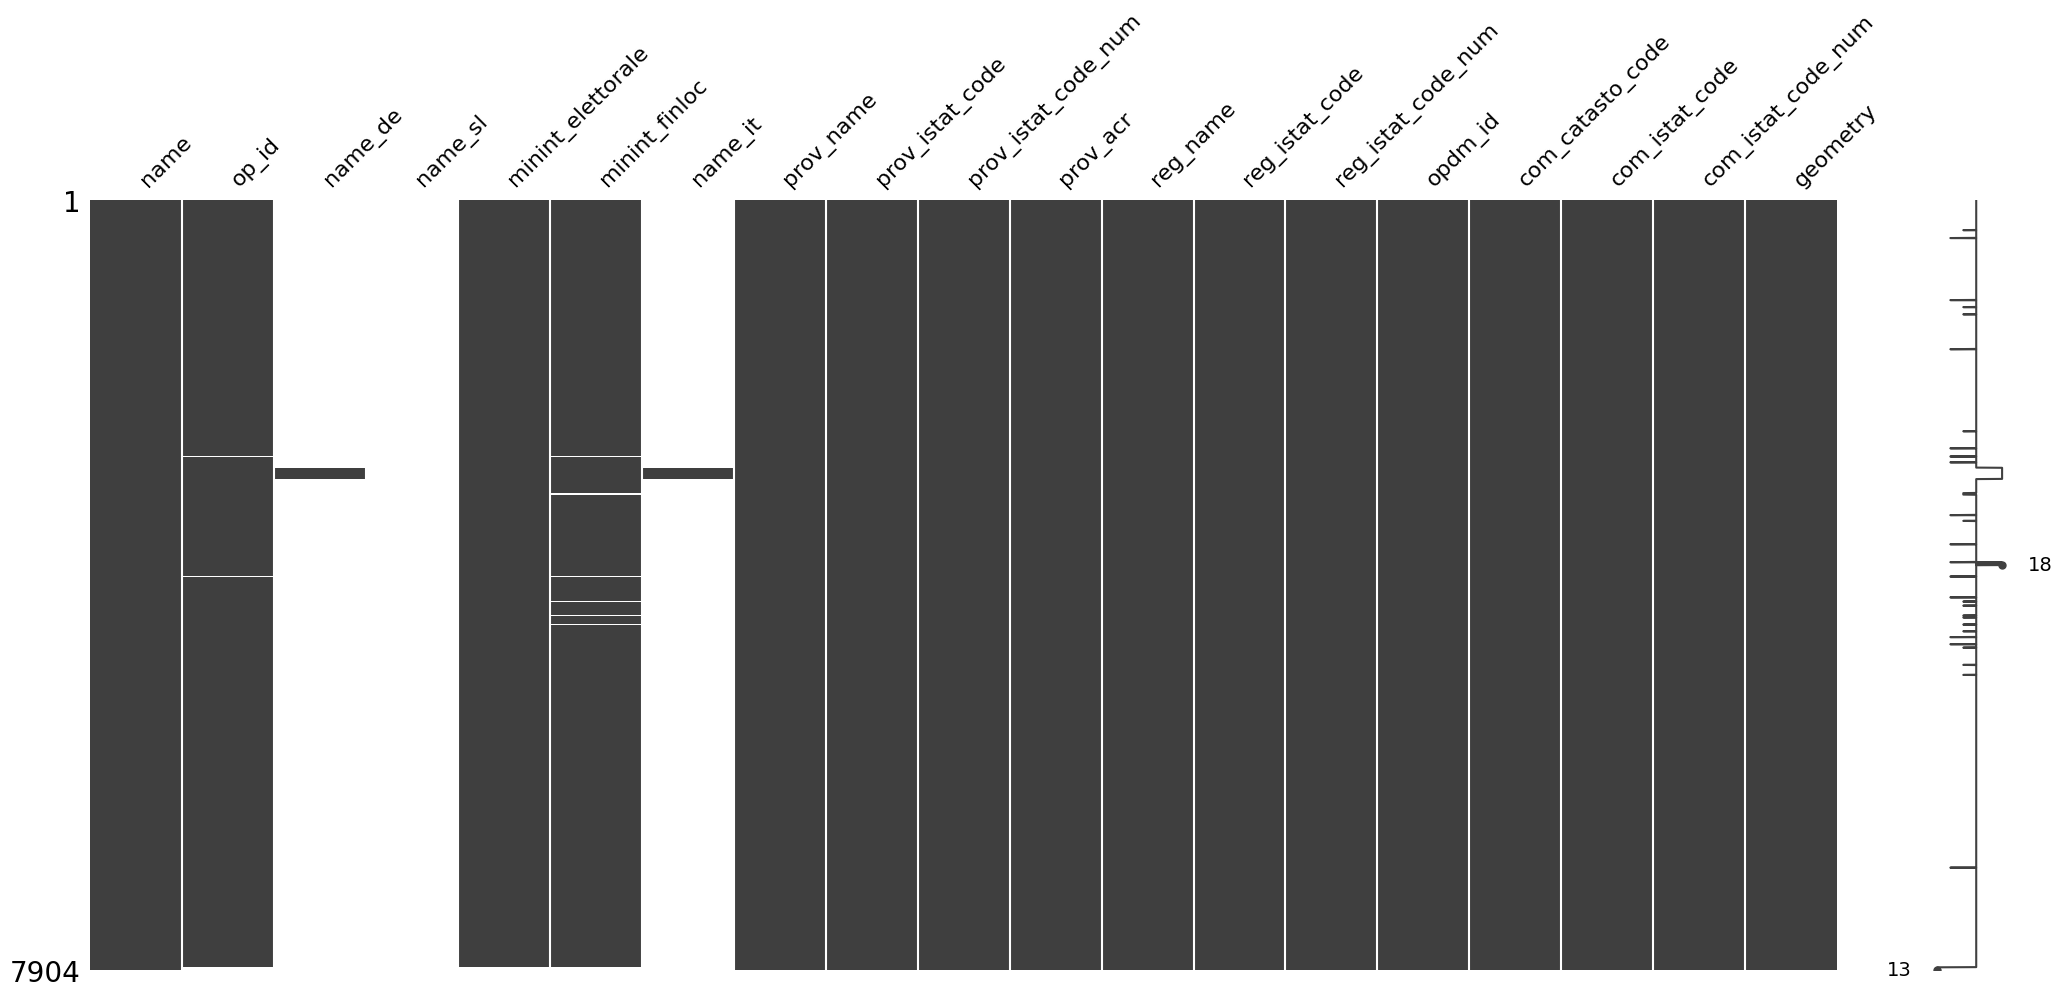

In [41]:
import missingno as msno

msno.matrix(municipalities_df)

In [43]:
# print name_sl that is not null
municipalities_df[municipalities_df['name_sl'].notnull()]

,name,op_id,name_de,name_sl,minint_elettorale,minint_finloc,name_it,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,geometry
3720,Doberdò del Lago-Doberdob,3936,NaN,Doberdob,1060350030,2060350030,Doberdò del Lago,Gorizia,031,31,GO,Friuli-Venezia Giulia,06,6,3787,D312,031003,31003,"MULTIPOLYGON (((13.58687 45.87081, 13.58396 45..."
3736,San Floriano del Collio-teverjan,3952,NaN,San Floriano del Collio-Števerjan,1060350160,2060350160,San Floriano del Collio,Gorizia,031,31,GO,Friuli-Venezia Giulia,06,6,3803,H845,031019,31019,"MULTIPOLYGON (((13.59856 45.98780, 13.60421 45..."
3739,Savogna d'Isonzo-Sovodnje ob So?i,3955,NaN,Savogna d'Isonzo-Sovodnje ob Soči,1060350180,2060350180,Savogna d'Isonzo,Gorizia,031,31,GO,Friuli-Venezia Giulia,06,6,3806,I479,031022,31022,"MULTIPOLYGON (((13.58356 45.91114, 13.58655 45..."
3743,Duino Aurisina-Devin Nabreina,3959,NaN,Duino Aurisina-Devin Nabrežina,1060920010,2060920010,Duino Aurisina,Trieste,032,32,TS,Friuli-Venezia Giulia,06,6,3810,D383,032001,32001,"MULTIPOLYGON (((13.59629 45.80794, 13.60331 45..."
3744,Monrupino-Repentabor,3960,NaN,Repentabor,1060920020,2060920020,Monrupino,Trieste,032,32,TS,Friuli-Venezia Giulia,06,6,3811,F378,032002,32002,"MULTIPOLYGON (((13.83054 45.71062, 13.83371 45..."
3746,San Dorligo della Valle-Dolina,3962,NaN,Dolina,1060920040,2060920040,San Dorligo della Valle,Trieste,032,32,TS,Friuli-Venezia Giulia,06,6,3813,D324,032004,32004,"MULTIPOLYGON (((13.91198 45.62861, 13.91112 45..."
3747,Sgonico-Zgonik,3963,NaN,Zgonik,1060920050,2060920050,Sgonico,Trieste,032,32,TS,Friuli-Venezia Giulia,06,6,3814,I715,032005,32005,"MULTIPOLYGON (((13.73600 45.76158, 13.73517 45..."


In [44]:
municipalities_df[municipalities_df['name_de'].notnull()]

,name,op_id,name_de,name_sl,minint_elettorale,minint_finloc,name_it,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,geometry
2748,Aldino/Aldein,2881,Aldein,NaN,1040140002,2040140002,Aldino,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2788,A179,021001,21001,"MULTIPOLYGON (((11.33993 46.40130, 11.35272 46..."
2749,Andriano/Andrian,2882,Andrian,NaN,1040140001,2040140001,Andriano,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2789,A286,021002,21002,"MULTIPOLYGON (((11.24288 46.52772, 11.24392 46..."
2750,Anterivo/Altrei,2883,Altrei,NaN,1040140010,2040140010,Anterivo,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2790,A306,021003,21003,"MULTIPOLYGON (((11.34675 46.29452, 11.35893 46..."
2751,Appiano sulla strada del vino/Eppan an der Wei...,2884,Eppan an der Weinstraße,NaN,1040140020,2040140020,Appiano sulla strada del vino,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2791,A332,021004,21004,"MULTIPOLYGON (((11.20784 46.52054, 11.21153 46..."
2752,Avelengo/Hafling,2885,Hafling,NaN,1040140021,2040140021,Avelengo,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2792,A507,021005,21005,"MULTIPOLYGON (((11.28934 46.69118, 11.28915 46..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,Vipiteno/Sterzing,2996,Sterzing,NaN,1040141070,2040141070,Vipiteno,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2900,M067,021115,21115,"MULTIPOLYGON (((11.50221 46.93664, 11.50212 46..."
2861,Velturno/Feldthurns,2992,Feldthurns,NaN,1040141031,2040141031,Velturno,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2901,L724,021116,21116,"MULTIPOLYGON (((11.55174 46.71313, 11.55478 46..."
2862,La Valle/Wengen,2917,Wengen,NaN,1040140401,2040140401,La Valle,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2902,E491,021117,21117,"MULTIPOLYGON (((11.92714 46.68361, 11.93393 46..."
2863,Senale-San Felice/Unsere Liebe Frau im Walde-S...,2971,Unsere Liebe Frau im Walde-St. Felix,NaN,1040140841,2040140841,Senale-San Felice,Bolzano/Bozen,021,21,BZ,Trentino-Alto Adige/Südtirol,04,4,2903,I603,021118,21118,"MULTIPOLYGON (((11.09129 46.53692, 11.09574 46..."


## Selecting which columns to keep

-***name***                    : name of the municipality </br>
-***com_istat_code_num***      : ISTAT code of the municipality</br>
-***prov_name***               : name of the province</br>
-***prov_istat_code_num***     : ISTAT code of the province</br>
-***prov_acr***                : acronym of the province</br>
-***region_name***             : name of the region</br>
-**region_istat_code_num**   : ISTAT code of the region</br>
-**geometry**                : geometry of the municipality</br>

In [48]:
# drop columns that are not needed
municipalities_df = municipalities_df[['name','com_istat_code_num','prov_name','prov_istat_code_num','prov_acr','reg_name','reg_istat_code_num','geometry']]
municipalities_df.head()

,name,com_istat_code_num,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code_num,geometry
0,Agliè,1001,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,1002,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,1003,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,1004,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,1006,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."


In [49]:
# rename columns
municipalities_df = municipalities_df.rename(columns={'name':'municipal_name','com_istat_code_num':'municipal_code','prov_name':'province_name','prov_istat_code_num':'province_code','prov_acr':'province_acr','reg_name':'region_name','reg_istat_code_num':'region_code'})
municipalities_df.head()

,municipal_name,municipal_code,province_name,province_code,province_acr,region_name,region_code,geometry
0,Agliè,1001,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,1002,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,1003,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,1004,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,1006,Torino,1,TO,Piemonte,1,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."


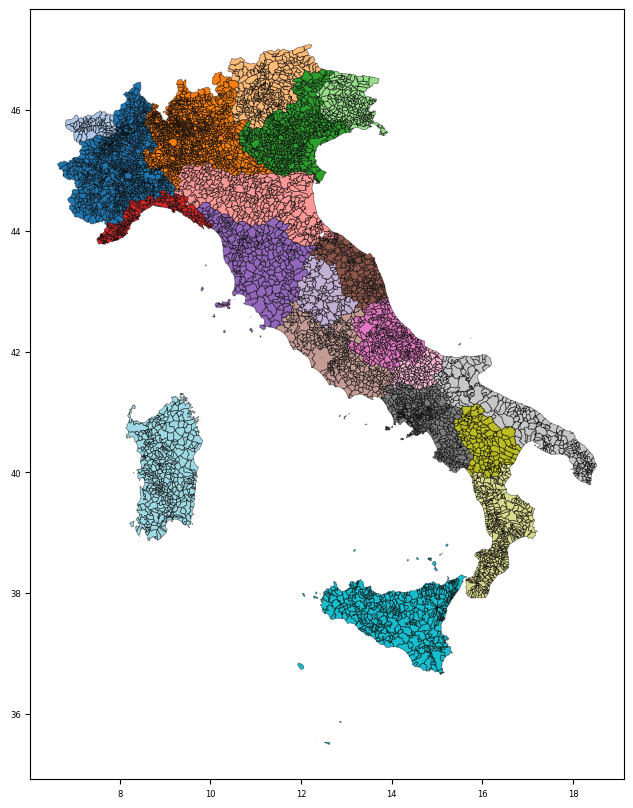

In [58]:
# plot municipalities
municipalities_df.plot(column='region_code', cmap='tab20', figsize=(10, 10))
# add grid lines for provinces and regions using municipalities_df
municipalities_df.boundary.plot(color=None, edgecolor='black', linewidth=0.5, ax=plt.gca(), alpha=0.5)

plt.show()

In [61]:
# save the municipalities_df to a geojson file
municipalities_df.to_file("../../../data/municipalities_cleaned.geojson", driver='GeoJSON')

In [62]:
province_df

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89303 45.58549, ..."
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92726 45.73470, ..."
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.41114 45.83017, ..."
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.93465 44.4..."
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.95845 45.11689, ..."
...,...,...,...,...,...,...,...,...
102,Sassari,90,SS,Sardegna,20,20,090,"MULTIPOLYGON (((9.46502 40.65584, 9.46568 40.6..."
103,Nuoro,91,NU,Sardegna,20,20,091,"MULTIPOLYGON (((9.28037 39.91741, 9.28195 39.9..."
104,Cagliari,92,CA,Sardegna,20,20,092,"MULTIPOLYGON (((8.84872 39.09924, 8.84784 39.0..."
105,Oristano,95,OR,Sardegna,20,20,095,"MULTIPOLYGON (((8.78200 40.18982, 8.78060 40.1..."


In [63]:
# drop columns that are not needed
province_df = province_df[['prov_name','prov_istat_code_num','prov_acr','reg_name','reg_istat_code_num','geometry']]

In [64]:
# rename columns
province_df = province_df.rename(columns={'prov_name':'province_name','prov_istat_code_num':'province_code','prov_acr':'province_acr','reg_name':'region_name','reg_istat_code_num':'region_code'})
province_df

,province_name,province_code,province_acr,region_name,region_code,geometry
0,Torino,1,TO,Piemonte,1,"POLYGON ((7.89397 45.58222, 7.89303 45.58549, ..."
1,Vercelli,2,VC,Piemonte,1,"POLYGON ((7.92900 45.74244, 7.92726 45.73470, ..."
2,Novara,3,NO,Piemonte,1,"POLYGON ((8.42079 45.82981, 8.41114 45.83017, ..."
3,Cuneo,4,CN,Piemonte,1,"MULTIPOLYGON (((6.94540 44.42794, 6.93465 44.4..."
4,Asti,5,AT,Piemonte,1,"POLYGON ((7.96685 45.11667, 7.95845 45.11689, ..."
...,...,...,...,...,...,...
102,Sassari,90,SS,Sardegna,20,"MULTIPOLYGON (((9.46502 40.65584, 9.46568 40.6..."
103,Nuoro,91,NU,Sardegna,20,"MULTIPOLYGON (((9.28037 39.91741, 9.28195 39.9..."
104,Cagliari,92,CA,Sardegna,20,"MULTIPOLYGON (((8.84872 39.09924, 8.84784 39.0..."
105,Oristano,95,OR,Sardegna,20,"MULTIPOLYGON (((8.78200 40.18982, 8.78060 40.1..."


In [65]:
# save the province_df to a geojson file
province_df.to_file("../../../data/provinces_cleaned.geojson", driver='GeoJSON')

In [66]:
region_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13608 45.27952, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73324 45.92345, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.58243 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.02158 46.55966..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63673 45.52090..."
5,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.52109 46..."
6,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.54683 43.8..."
7,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33055 44.7..."
8,Toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.90268 44.1..."
9,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.16034 42..."


In [ ]:
import pandas as pd
import geopandas as gpd
province_geo = gpd.read_file("../../../data/provinces_cleaned.geojson")
municipalities_geo = gpd.read_file("../../../data/municipalities_cleaned.geojson")